# Wiring diagrams in TikZ


Catlab can draw morphism expressions as TikZ pictures. To use this feature,
LaTeX must be installed and the Julia package
[TikzPictures.jl](https://github.com/sisl/TikzPictures.jl) must be imported
before Catlab is loaded.

In [1]:
import TikzPictures
using Catlab.WiringDiagrams, Catlab.Graphics

## Examples

### Symmetric monoidal category

In [2]:
using Catlab.Doctrines

A, B, C, D = Ob(FreeSymmetricMonoidalCategory, :A, :B, :C, :D)
f, g = Hom(:f, A, B), Hom(:g, B, A);

To start, here are a few very simple examples.

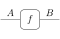

In [3]:
to_tikz(f, labels=true)

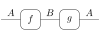

In [4]:
to_tikz(f⋅g, labels=true)

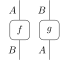

In [5]:
to_tikz(f⊗g, labels=true, orientation=TopToBottom)

Here is a more complex example, involving generators with compound domains and
codomains.

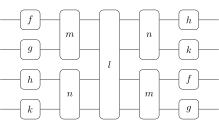

In [6]:
h, k = Hom(:h, C, D),  Hom(:k, D, C)
m, n = Hom(:m, B⊗A, A⊗B), Hom(:n, D⊗C, C⊗D)
q = Hom(:l, A⊗B⊗C⊗D, D⊗C⊗B⊗A)

to_tikz((f⊗g⊗h⊗k)⋅(m⊗n)⋅q⋅(n⊗m)⋅(h⊗k⊗f⊗g))

Identities and braidings appear as wires.

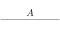

In [7]:
to_tikz(id(A), labels=true)

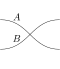

In [8]:
to_tikz(braid(A,B), labels=true, labels_pos=0.25)

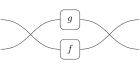

In [9]:
to_tikz(braid(A,B) ⋅ (g⊗f) ⋅ braid(A,B))

The isomorphism $A \otimes B \otimes C \to C \otimes B \otimes A$ induced by
the permutation $(3\ 2\ 1)$ is a composite of braidings and identities.

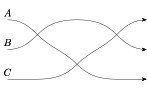

In [10]:
to_tikz((braid(A,B) ⊗ id(C)) ⋅ (id(B) ⊗ braid(A,C) ⋅ (braid(B,C) ⊗ id(A))),
        arrowtip="Stealth", arrowtip_pos=1.0, labels=true, labels_pos=0.0)

### Biproduct category

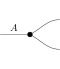

In [11]:
A, B = Ob(FreeBiproductCategory, :A, :B)
f = Hom(:f, A, B)

to_tikz(mcopy(A), labels=true)

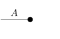

In [12]:
to_tikz(delete(A), labels=true)

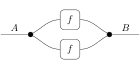

In [13]:
to_tikz(mcopy(A)⋅(f⊗f)⋅mmerge(B), labels=true)

### Compact closed category

The unit and co-unit of a compact closed category appear as caps and cups.

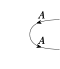

In [14]:
A, B = Ob(FreeCompactClosedCategory, :A, :B)

to_tikz(dunit(A), arrowtip="Stealth", labels=true)

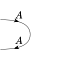

In [15]:
to_tikz(dcounit(A), arrowtip="Stealth", labels=true)

In a self-dual compact closed category, such as a bicategory of relations,
every morphism $f: A \to B$ has a transpose $f^\dagger: B \to A$ given by
bending wires:

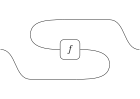

In [16]:
A, B = Ob(FreeBicategoryRelations, :A, :B)
f = Hom(:f, A, B)

to_tikz((dunit(A) ⊗ id(B)) ⋅ (id(A) ⊗ f ⊗ id(B)) ⋅ (id(A) ⊗ dcounit(B)))

### Abelian bicategory of relations

In an abelian bicategory of relations, such as the category of linear
relations, the duplication morphisms $\Delta_X: X \to X \otimes X$ and
addition morphisms $\blacktriangledown_X: X \otimes X \to X$ belong to a
bimonoid. Among other things, this means that the following two morphisms are
equal.

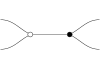

In [17]:
X = Ob(FreeAbelianBicategoryRelations, :X)

to_tikz(mplus(X) ⋅ mcopy(X))

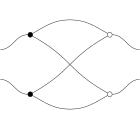

In [18]:
to_tikz((mcopy(X)⊗mcopy(X)) ⋅ (id(X)⊗braid(X,X)⊗id(X)) ⋅ (mplus(X)⊗mplus(X)))

## Custom styles

The visual appearance of wiring diagrams can be customized using the builtin
options or by redefining the TikZ styles for the boxes or wires.

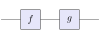

In [19]:
A, B, = Ob(FreeSymmetricMonoidalCategory, :A, :B)
f, g = Hom(:f, A, B), Hom(:g, B, A)

pic = to_tikz(f⋅g, styles=Dict(
  "box" => ["draw", "fill"=>"{rgb,255: red,230; green,230; blue,250}"],
))

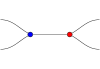

In [20]:
X = Ob(FreeAbelianBicategoryRelations, :X)

to_tikz(mplus(X) ⋅ mcopy(X), styles=Dict(
  "junction" => ["circle", "draw", "fill"=>"red", "inner sep"=>"0"],
  "variant junction" => ["circle", "draw", "fill"=>"blue", "inner sep"=>"0"],
))

## Output formats

The function `to_tikz` returns an object of type `TikZ.Document`, representing
a TikZ picture and its TikZ library dependencies as an abstract syntax tree.
When displayed interactively, this object is compiled by LaTeX to PDF and then
converted to SVG.

To generate the LaTeX source code, use the builtin pretty-printer. This
feature does not require LaTeX or TikzPictures.jl to be installed.

In [21]:
import Catlab.Graphics: TikZ

doc = to_tikz(f⋅g)
TikZ.pprint(doc)

\usetikzlibrary{calc}
\begin{tikzpicture}[x=1em,y=1em,outer box/.style={draw=none},box/.style={rectangle,draw,solid,rounded corners},circular box/.style={circle,draw,solid},junction/.style={circle,draw,fill,inner sep=0},variant junction/.style={circle,draw,solid,inner sep=0},invisible/.style={draw=none,inner sep=0},wire/.style={draw}]
  \node[outer box,minimum width=10em,minimum height=4em] (root) at (0,0) {};
  \node[box,minimum size=2em] (n3) at (-2,0) {$f$};
  \node[box,minimum size=2em] (n4) at (2,0) {$g$};
  \path[wire] (root.west) to[out=0,in=-180] (n3.west);
  \path[wire] (n3.east) to[out=0,in=-180] (n4.west);
  \path[wire] (n4.east) to[out=0,in=180] (root.east);
\end{tikzpicture}